# TD1: Linear and Polynomial Regressions; Application to Classification

In [1]:
import numpy as np
import scipy.io as sio
import pandas as pd
import matplotlib.pyplot as plt

## Linear and polynomial regression: curve fitting

Let $(X,Y)$ be a pair of real random variable such that $X$ is uniform on $[0,1]$ and $Y = f_*(X)+\sigma \varepsilon$, where $f_*(x) = \sin(6x)$, $\sigma = 0.5$, and $\varepsilon$ is some is a standard Gaussian random variable, independent from $X$. 

(1) Generate $n = 40$ realizations $(x_i, y_i), i = 1, \dots n$ of $(X,Y)$.

In [4]:
n = 40
sigma = 0.5

def f(x):
    return np.sin(6*x)

X = np.random.uniform(0, 1, 40)
Y = [f(x) + sigma * np.random.normal() for x in X]

(2) Plot the realizations of $(X,Y)$, along with the curve $y = f_*(x)$.

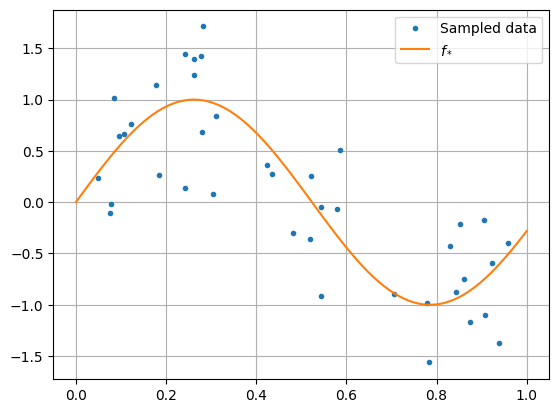

In [14]:
plt.plot(X, Y, '.', label="Sampled data")
xs = np.linspace(0, 1, 100)
plt.plot(xs, [f(x) for x in xs], label="$f_*$")
plt.grid()
plt.legend()

In this section, we try to learn the function $f_*$ from the $n$ samples. We start with empirical risk minimization over the set of linear functions. 

(3) What are here the input space $\mathcal{X}$ of the linear regression? What is the output space $\mathcal{Y}$? What is the risk $R(f)$ of a classifier $f:\mathcal{X} \to \mathcal{Y}$ in terms of $\sigma$? What is the optimal classifier among all $L^2$ functions $f:\mathcal{X} \to \mathcal{Y}$? (Here optimal means that it minimizes the risk $R(f)$.) What is the risk of the optimal classifier?

**Answer:** We have $\mathcal{X} = \mathbb{R}$ and $\mathcal{Y} = \mathbb{R}$. The risk $R(f)$ is defined by:
\begin{equation*}
    \begin{aligned}
        R(f) &= \mathbb{E}[(Y-f(X))^2]\\
        &= \mathbb{E}[(f_*(X)+\sigma \varepsilon - f(X))^2]\\
        &= \mathbb{E}[(f_*(X)-f(X))^2] + 2\sigma\mathbb{E}[\varepsilon(f_*(X)-f(X))] + \sigma^2\mathbb{E}[\varepsilon^2]\\
        &= \mathbb{E}[(f_*(X)-f(X))^2] + 2\sigma\mathbb{E}[\varepsilon(f_*(X)-f(X))]\mathbb{E}[\varepsilon] + \sigma^2\\
        &= \mathbb{E}[(f_*(X)-f(X))^2] + \sigma^2
    \end{aligned}
\end{equation*}
Hence the best $f$ is $f*$, and $R(f_\star)=\sigma^2$.

The empirical risk minimization over the set of linear function means that we estimate
$$ \hat{f} = {\rm argmin}_{f \in F} \hat{R}_n(f) $$ 
where 
$$ F = \{f(x) = \theta_1 x + \theta_0 | \theta_0, \theta_1 \in \mathbb{R}\} \, , $$
$$ \hat{R}_n(f) = \frac{1}{n} \sum_{i=1}^{n} (y_i - f(x_i))^2 \, .$$

(4) Writing $\hat{f}(x) = \theta_1 x + \theta_0$, find a closed-from formula for $\theta_0$, $\theta_1$ in terms of the observations $(x_i,y_i)$.

\begin{equation}
    \hat{R}_n(\theta_1x+\theta_0) = \frac{1}{n} \sum_{i=1}^{n} (y_i - \theta_1x_i-\theta_0)^2
\end{equation}
We compute where the gradient vanishes.
$$ \theta_1 = \frac{\frac{1}{n}\sum y_ix_i - \frac{1}{n^2}\sum y_i \sum x_i}{\frac{1}{n}\sum x_i^2 - \left(\frac{1}{n}\sum x_i\right)^2} \, ,$$
$$ \theta_0 = \frac{1}{n} \sum y_i - \left(\frac{1}{n}\sum x_i\right)\theta_1 .$$

(5) Using this formula, complete the previous plot with this estimator.

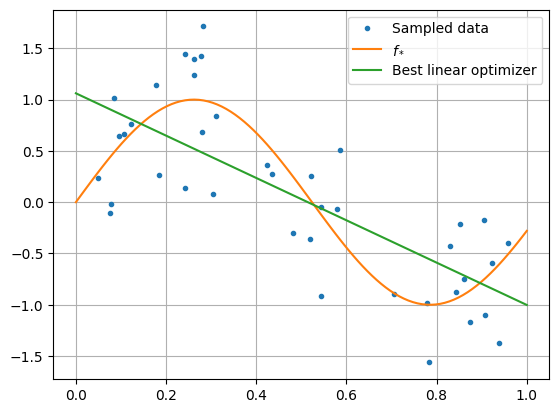

In [20]:
theta_1 = (sum([X[i]*Y[i] for i in range(len(X))])/n - sum(X)*sum(Y)/(n*n))/(sum([x*x for x in X])/n - (sum(X)/n)**2)
theta_0 = sum(Y)/n - (sum(X)/n)*theta_1

plt.plot(X, Y, '.', label="Sampled data")
xs = np.linspace(0, 1, 100)
plt.plot(xs, [f(x) for x in xs], label="$f_*$")
plt.plot(xs, [theta_1*x+theta_0 for x in xs], label="Best linear optimizer")
plt.grid()
plt.legend()

(6) Repeat the computation of the coefficients, using now the function `numpy.linalg.lstsq` . Check on the plot that the results are the same.

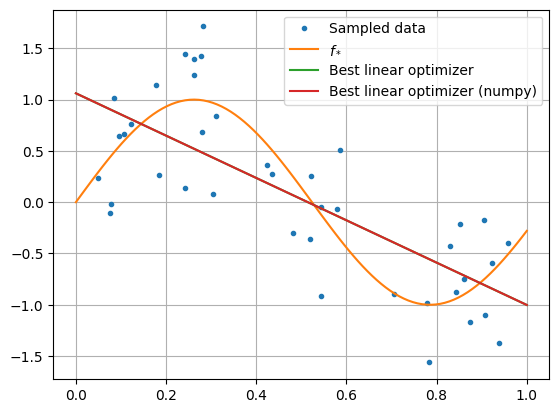

In [40]:
theta_1 = (sum([X[i]*Y[i] for i in range(len(X))])/n - sum(X)*sum(Y)/(n*n))/(sum([x*x for x in X])/n - (sum(X)/n)**2)
theta_0 = sum(Y)/n - (sum(X)/n)*theta_1

t = np.linalg.lstsq(np.array([np.ones(n), X]).T, Y, rcond=None)
t0, t1 = t[0][0], t[0][1]

plt.plot(X, Y, '.', label="Sampled data")
xs = np.linspace(0, 1, 100)
plt.plot(xs, [f(x) for x in xs], label="$f_*$")
plt.plot(xs, [theta_1*x+theta_0 for x in xs], label="Best linear optimizer")
plt.plot(xs, [t1*x+t0 for x in xs], label="Best linear optimizer (numpy)")
plt.grid()
plt.legend()

(7) Minimize the empirical risk over the set of polynomials of order 2. Plot the optimal polynomial.

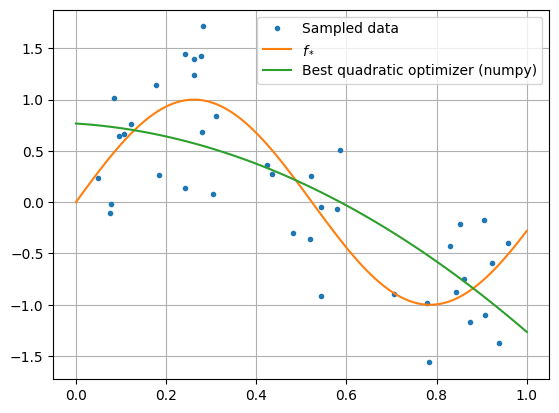

In [44]:
t = np.linalg.lstsq(np.array([np.ones(n), X, X**2]).T, Y, rcond=None)[0]
t0, t1, t2 = t

plt.plot(X, Y, '.', label="Sampled data")
xs = np.linspace(0, 1, 100)
plt.plot(xs, [f(x) for x in xs], label="$f_*$")
plt.plot(xs, [t2*x*x + t1*x+t0 for x in xs], label="Best quadratic optimizer (numpy)")
plt.grid()
plt.legend()

(8) Generalize your code in order to compute the optimal polynomial of order $k$. Vary $k$ and the number of samples $n$, and plot the results. Comment.

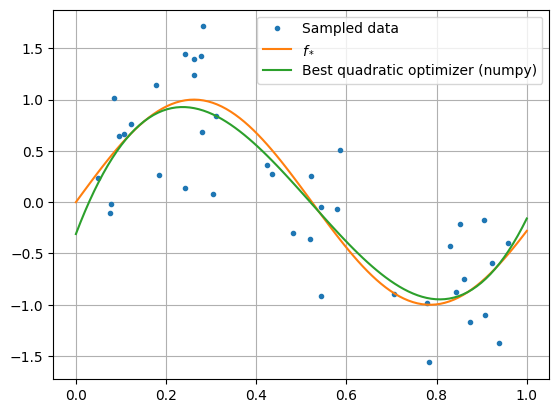

In [60]:
k = 3
t = np.linalg.lstsq(np.array([X**j for j in range(k+1)]).T, Y, rcond=None)[0]

plt.plot(X, Y, '.', label="Sampled data")
plt.plot(xs, [f(x) for x in xs], label="$f_*$")
plt.plot(xs, [sum([t[i]*(x**i) for i in range(k+1)]) for x in xs], label="Best quadratic optimizer (numpy)")
plt.grid()
plt.legend()

(9) Let us denote $\hat{f}_k$ the minimizer of the empirical risk over the polynomials of order $k$. Plot the risk $R(\hat{f}_k)$ and the empirical risk $\hat{R}_n(\hat{f}_k)$ as a function of $k$, for $n=40$ and $n=400$. Comment.

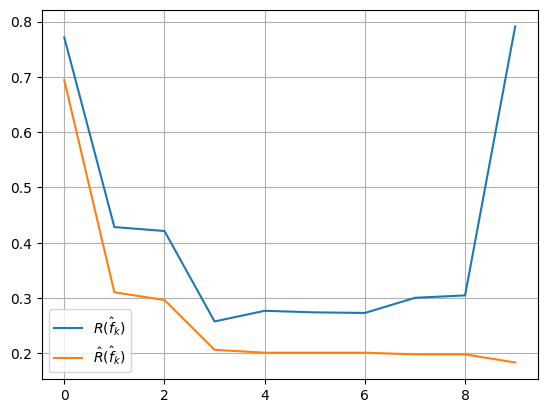

In [76]:
maxi = 10
R = []
Rat = []
for k in range(maxi):
    t = np.linalg.lstsq(np.array([X**j for j in range(k+1)]).T, Y, rcond=None)[0]
    def g(x):
        return sum([t[i]*(x**i) for i in range(k+1)])
    R.append(sum([(f(x)-g(x))**2 for x in xs])/len(xs) + sigma*sigma)
    Rat.append(sum([(Y[i]-g(X[i]))**2 for i in range(len(X))])/n)

plt.plot(list(range(maxi)), R, label="$R(\hat{f}_k)$")
plt.plot(list(range(maxi)), Rat, label="$\hat{R}(\hat{f}_k)$")
plt.legend()
plt.grid()

(10) Repeat question (8) and (9) with $f_*(x) = 1.2x + 4x^2 + 4.4x^3 - 3.8x^4 + 3.6 x^5$ and $n=20$.

## Linear and polynomial classifiers

In [67]:
data_train = pd.read_csv('./classification_data/classificationA_train', header=None, sep='\t')
data_train = data_train.rename(columns = {0:'x', 1:'y', 2:'class'})
data_test = pd.read_csv('./classification_data/classificationA_test', header=None, sep='\t')
data_test = data_test.rename(columns = {0:'x', 1:'y', 2:'class'})
data_train.head()

,x,y,class
0,-3.603405,1.3266,1.0
1,-4.219011,2.0150,1.0
2,-1.515658,0.5059,1.0
3,-1.169757,0.3815,1.0
4,0.522741,-0.6572,1.0


In [68]:
data0_train = data_train.loc[data_train['class'] == 0]
x0_train = np.array(data0_train['x'])
y0_train = np.array(data0_train['y'])
data1_train = data_train.loc[data_train['class'] == 1]
x1_train = np.array(data1_train['x'])
y1_train = np.array(data1_train['y'])

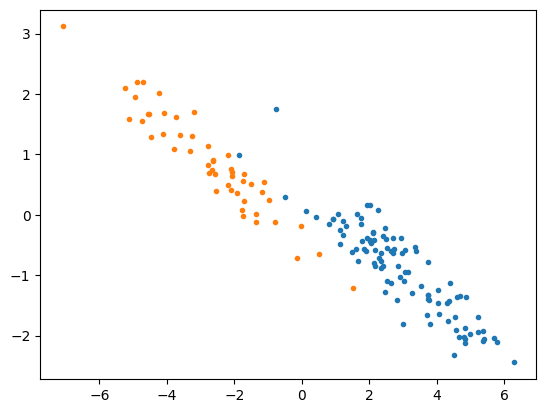

In [69]:
plt.plot(x0_train,y0_train,'.')
plt.plot(x1_train,y1_train,'.')
plt.show()

In [70]:
data0_test = data_test.loc[data_test['class'] == 0]
x0_test = np.array(data0_test['x'])
y0_test = np.array(data0_test['y'])
data1_test = data_test.loc[data_test['class'] == 1]
x1_test = np.array(data1_test['x'])
y1_test = np.array(data1_test['y'])

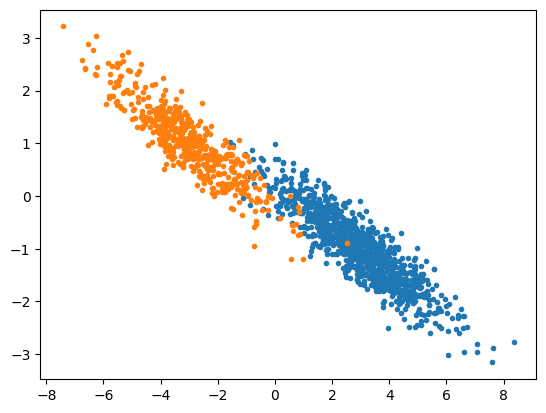

In [71]:
plt.plot(x0_test,y0_test,'.')
plt.plot(x1_test,y1_test,'.')
plt.show()

We want to build a classifier using that train dataset `classificationA_train` and that will perform well on the test dataset `classificationA_test`. To this end, we map the classification problem into a regression problem: we seek a function $f$ that maps $(x,y)$ onto its class $c \in \{0,1\}$. In practice, we will allow $f$ to take real values and will predict class $1$ iif $f(x,y) \geq 1/2$. 

To build the function $f$, we seek to minimize the empirical risk 
$$ \hat{R}_n(f) = \frac{1}{n}\sum_{i=1}^{n}(f(x_i,y_i)-c_i)^2 $$
over the set of linear classifier $f$. 

(11) Compute the estimator 
$$ \hat{f} = {\rm argmin}_{f{\rm \, linear}} \hat{R}_n(f) \, .$$
Plot the resulting frontier $f(x,y) = 1/2$ over the train dataset.

(12) Produce the same plot for the test dataset. Compute the error of the linear classifier over the test dataset. Do you think there exists a better classifier?

(13) Repeat the experiments with the datasets `classificationB` and `classificationC`. What is the situation now?

(14) Add quadratic features to allow for a larger type of classification rules. What is the mathematical set of possible frontiers? How does the performance evolve?

We assume that the data $(X,Y)$ has been generated according to the following process:
- $Y$ is a Bernoulli random variable with parameter $p$,
- conditionally on $Y = 1$, $X$ is a random variable in $\mathbb{R}^2$ with density $p_1(x)$ (with respect to the Lesbegue measure), and conditionally on $Y = 0$, $X$ is a random variable with density $p_0(x)$.

(15) What is the predictor $f_*:\mathbb{R}^2 \to \{0,1\}$ minimizing the error $\mathcal{E}(f) = \mathbb{P}\left(f(X) \neq Y\right)$? (in terms of $p$, $p_0$ and $p_1$)

\begin{equation}
\begin{aligned}
    \mathcal{E}(f) &= \mathbb{P}(f(X)\neq Y)\\
    &= \mathbb{P}(f(X)\neq Y | Y = 0)(1-p) + \mathbb{P}(f(X)\neq Y | Y = 1)p\\
    &= \mathbb{P}(f(X) = 1 | Y = 0)(1-p) + \mathbb{P}(f(X) = 0 | Y = 1)p\\
\end{aligned}
\end{equation}
Therefore, $f_* = 1_{(1-p)p_0(x)\leq pp_1(x)}$.

(16) Assume that the laws of $X$ conditionally on $Y$ are Gaussian with the same covariance, namely
\begin{align*}
&X \, | \, Y = 0 \sim \mathcal{N}(\mu_0,\Sigma) \, ,
&&X \, | \, Y = 1 \sim \mathcal{N}(\mu_1,\Sigma) \, .
\end{align*}
What is the frontier built by the optimal predictor?

(17) Assume that the laws of $X$ conditionally on $Y$ are Gaussian with the same covariance, namely
\begin{align*}
&X \, | \, Y = 0 \sim \mathcal{N}(\mu_0,\Sigma_0) \, ,
&&X \, | \, Y = 1 \sim \mathcal{N}(\mu_1,\Sigma_1) \, .
\end{align*}
What is the frontier built by the optimal predictor?

## Linear and polynomial classification on the MNIST dataset

In [11]:
data = sio.loadmat('mnist_digits.mat')

In [12]:
data_x = data['x']
data_y = data['y']
print(data_x.shape)

(66000, 784)


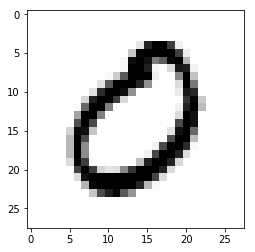

In [13]:
i = np.random.randint(len(data['x']))
plt.imshow(np.reshape(data_x[i],(28,28)), cmap='binary')
plt.show()

In [14]:
data_y[i]

array([0.], dtype=float32)

(18) Open question: choose two digits and train a classifier that distinguishes the two digits using the methods seen in this TD. 

Make sure that you divide the dataset into training and test sets to be able to evaluate the performance of your algorithms. 

Add noise to the images and repeat the experiments.